In [ ]:
#processed_data_path = os.path.join(os.path.pardir,'data','processed')
#write_Train_path = os.path.join(processed_data_path,'train.csv')
#write_test_path  = os.path.join(processed_data_path, 'test.csv')

# get the path of the precessed data
#processed_data_path = os.path.join(os.path.pardir,'data','processed')
#train_file_path = os.path.join(processed_data_path,'train.csv')
#test_file_path = os.path.join(processed_data_path,'test.csv')

In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Loadig data
data_path_train = "C:\\Users\\BLESS\\Desktop\\20-restaurant-sales\\data\\train.csv"
data_path_test = "C:\\Users\\BLESS\\Desktop\\20-restaurant-sales\\data\\test.csv"
train_df = pd.read_csv(data_path_train)
test_df = pd.read_csv(data_path_test)

In [6]:
train_df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [7]:
test_df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          100000 non-null  int64  
 1   Open Date   100000 non-null  object 
 2   City        100000 non-null  object 
 3   City Group  100000 non-null  object 
 4   Type        100000 non-null  object 
 5   P1          100000 non-null  int64  
 6   P2          100000 non-null  float64
 7   P3          100000 non-null  float64
 8   P4          100000 non-null  float64
 9   P5          100000 non-null  int64  
 10  P6          100000 non-null  int64  
 11  P7          100000 non-null  int64  
 12  P8          100000 non-null  int64  
 13  P9          100000 non-null  int64  
 14  P10         100000 non-null  int64  
 15  P11         100000 non-null  int64  
 16  P12         100000 non-null  int64  
 17  P13         100000 non-null  float64
 18  P14         100000 non-null  int64  
 19  P15

There are no missing values.
Last column 'revenue' is our target column.
Id column is redundant, it will be droped. To avoid it we can choose it as index column while reading data.i.e., using pd.read_csv('filepath',index_col=col_name_or_positional_no)
In feature Open date, I will focus on month and year and drop date values.
City, City Group and Type are categorical columns. To feed them to ML model they need to be converted into machine-readable form which is numerical form.

In [10]:
train_df.drop('Id',axis=1,inplace=True)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open Date   137 non-null    object 
 1   City        137 non-null    object 
 2   City Group  137 non-null    object 
 3   Type        137 non-null    object 
 4   P1          137 non-null    int64  
 5   P2          137 non-null    float64
 6   P3          137 non-null    float64
 7   P4          137 non-null    float64
 8   P5          137 non-null    int64  
 9   P6          137 non-null    int64  
 10  P7          137 non-null    int64  
 11  P8          137 non-null    int64  
 12  P9          137 non-null    int64  
 13  P10         137 non-null    int64  
 14  P11         137 non-null    int64  
 15  P12         137 non-null    int64  
 16  P13         137 non-null    float64
 17  P14         137 non-null    int64  
 18  P15         137 non-null    int64  
 19  P16         137 non-null    i

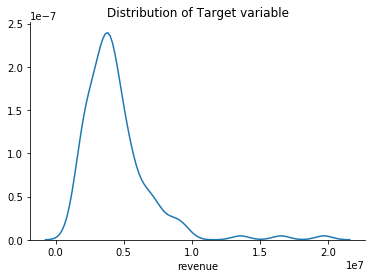

In [13]:
sns.distplot(train_df['revenue'],hist=False)
plt.title('Distribution of Target variable')
sns.despine();

In [14]:
#Create a checkpoint so that we can easily access original dataset
df = pd.concat([train_df,test_df],axis=0)

# Extracting month and year from date column
df['Open Date'] = pd.to_datetime(df['Open Date'])
df['launch_Month'] = [x.month for x in df['Open Date']]
df['launch_year'] = [x.year for x in df['Open Date']]
df.drop(['Id','Open Date'],axis=1,inplace=True)

In [15]:
df.head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P31,P32,P33,P34,P35,P36,P37,revenue,launch_Month,launch_year
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,3,4,5,5,4,3,4,5653753.0,7,1999
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,6923131.0,2,2008
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,0,0,2055379.0,3,2013
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,...,12,10,6,18,12,12,6,2675511.0,2,2012
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,...,1,3,2,3,4,3,3,4316715.0,5,2009


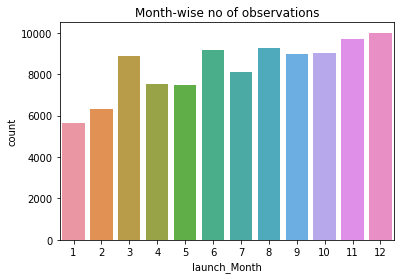

In [16]:
sns.countplot(df['launch_Month'])
plt.title('Month-wise no of observations');

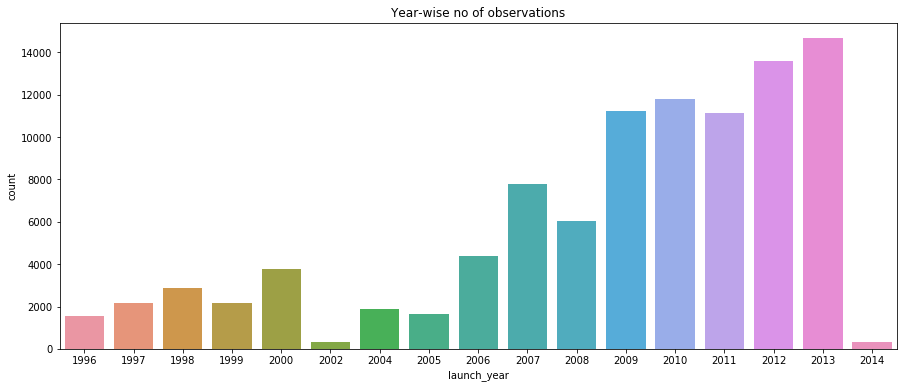

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(df['launch_year'],order=[1996,1997,1998,1999,2000,2002,2004,2005,2006,
                                       2007,2008,2009,2010,2011,2012,2013,2014])
plt.title('Year-wise no of observations');

## Preprocessing the data

In [19]:
df['Type'].value_counts()

FC    57095
IL    40507
DT     2245
MB      290
Name: Type, dtype: int64

In [20]:
df['City Group'].value_counts()

Other         50787
Big Cities    49350
Name: City Group, dtype: int64

In [21]:
df['City'].value_counts()

İstanbul     34137
Ankara        8739
İzmir         6474
Antalya       5915
Kocaeli       4365
             ...  
Karabük          1
Tokat            1
Amasya           1
Kastamonu        1
Elazığ           1
Name: City, Length: 63, dtype: int64

In [22]:
df.drop('City',axis=1,inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100137 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   City Group    100137 non-null  object 
 1   Type          100137 non-null  object 
 2   P1            100137 non-null  int64  
 3   P2            100137 non-null  float64
 4   P3            100137 non-null  float64
 5   P4            100137 non-null  float64
 6   P5            100137 non-null  int64  
 7   P6            100137 non-null  int64  
 8   P7            100137 non-null  int64  
 9   P8            100137 non-null  int64  
 10  P9            100137 non-null  int64  
 11  P10           100137 non-null  int64  
 12  P11           100137 non-null  int64  
 13  P12           100137 non-null  int64  
 14  P13           100137 non-null  float64
 15  P14           100137 non-null  int64  
 16  P15           100137 non-null  int64  
 17  P16           100137 non-null  int64  
 18  P17  

In [24]:
#converting other categorical columns
df['Type'] = df['Type'].map({'FC':0,'IL':1,'DT':2,'MB':3})

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df['City Group'] = encoder.fit_transform(np.array(df['City Group']).reshape(-1,1))
df['City Group'] = df['City Group'].apply(int)

In [25]:
df.dropna().groupby('launch_Month')['revenue'].mean()

launch_Month
1     5.900851e+06
2     4.189109e+06
3     3.969557e+06
4     4.726097e+06
5     3.657800e+06
6     3.776214e+06
7     3.458596e+06
8     3.883020e+06
9     5.390856e+06
10    5.236838e+06
11    4.721400e+06
12    4.299763e+06
Name: revenue, dtype: float64

### Revenue is a bit higher in months of Jan, Sept and Oct.

In [ ]:
df['launch_Month'] = pd.cut(df['launch_Month'],4,labels=['First quarter','Second quarter',
                                                         'Third quater','Fourth quater'])
plt.figure(figsize=(6,6))
sns.countplot(df['launch_Month']);

In [ ]:
df.groupby('launch_year')['revenue'].mean()

* Year 1999 has recorded highest revenues.
* Years 2000, 2013 and 2014 proved to be worst years for restaurants. Though number of observations is too low for year 2014, may be the big picture is differnt from this

In [26]:
# creating dummy variables
df['launch_year'].astype(object)
year_dummy = pd.get_dummies(df[['launch_year','launch_Month']],drop_first=True)
df = pd.concat([df,year_dummy],axis=1)
df.drop(['launch_year','launch_Month'],axis=1, inplace=True)

In [27]:
# Re-splitting train and test data
processed_df = df.dropna(axis=0)
processed_test_data = df[137:].drop('revenue',axis=1)
# remember there were 137 rows in train data

In [28]:
processed_df.shape,processed_test_data.shape

((137, 40), (100000, 39))

In [29]:
#Check it once
processed_df.head()

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1,4,5.0,4.0,4.0,2,2,5,4,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,0,0,4,5.0,4.0,4.0,1,2,5,5,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,1,1,2,4.0,2.0,5.0,2,3,5,5,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,1,1,6,4.5,6.0,6.0,4,4,10,8,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,1,1,3,4.0,3.0,4.0,2,2,5,5,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [31]:
#processed_df.to_csv("train_processed_df.csv")
#processed_test_data.to_csv("test_processed_df.csv")